# Stroke Dataset Exploration:
## by: A'isha Ahmad Mahmoud Eshra

## Preliminary Wrangling

> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

##### You can find the original datast [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> What are the main features causing Stroke?

In [34]:
# Reading our dataset and assessing it
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.sample(5)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
150,11933,Female,79.0,0,0,169.67,NaN,Unknown,1
1345,2275,Female,47.0,0,0,112.09,24.7,smokes,0
310,45538,Female,43.0,0,0,115.22,21.2,Unknown,0
2569,58936,Male,59.0,0,0,203.16,43.4,Unknown,0
4013,36388,Male,44.0,1,0,91.28,26.5,never smoked,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 359.4+ KB


In [36]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36514.625440,43.235616,0.097456,0.054012,106.132372,28.894439,0.048728
std,21159.987097,22.614944,0.296607,0.226063,45.284208,7.853524,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.232500,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.865000,28.100000,0.000000
75%,54637.250000,61.000000,0.000000,0.000000,114.080000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [37]:
df.duplicated().sum()

1

## Univariate Exploration

### What is the structure of your dataset?

> There are 3426 records in our dataset. Each row provides relavant information about the patient such as: gender, age, various diseases, and smoking status.

### What is/are the main feature(s) of interest in your dataset?

> Stroke Event.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender, Age, Smoking, Diseases.

#### How many patients smoke?

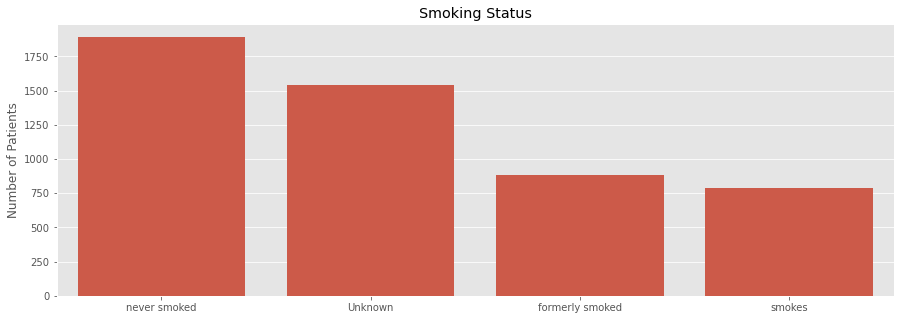

In [38]:
#styling our visualization
plt.style.use("ggplot")
base_color = sb.color_palette()[0]
plt.figure(figsize=(15,5))

#take a sneek on the smoking status attribute on bar chart
smoking_Order = df['smoking_status'].value_counts().index
sb.countplot(data = df, x = 'smoking_status', color = base_color, order = smoking_Order)

plt.title('Smoking Status')
plt.xlabel('')
plt.ylabel('Number of Patients')
plt.tight_layout;

#### as we can see in our data most of them aren't smookers, but we can see that there's alot of nulls (unknown) in smoking status column.

#### Does they have a history with other diseases?

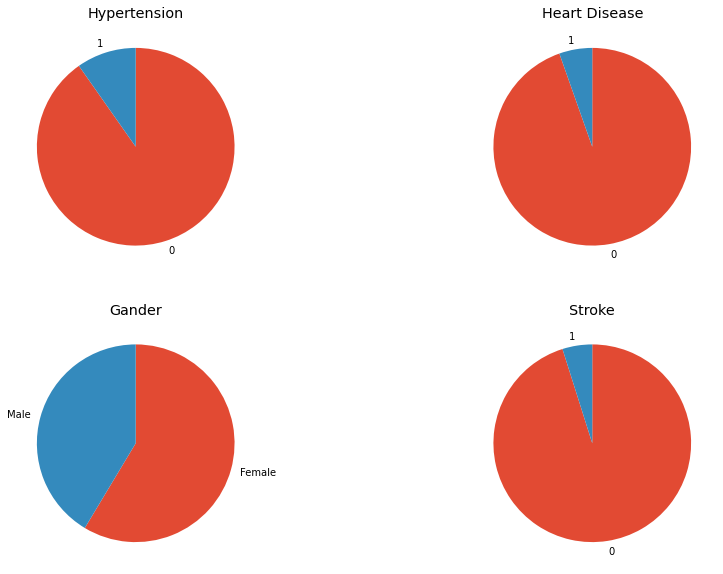

In [39]:
# drawing pie plots of our binary attributes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

# hypertension 
hypertension_counts = df['hypertension'].value_counts(sort = False)
ax1.pie(hypertension_counts, labels = hypertension_counts.index, startangle = 90, counterclock = False)
ax1.set_title("Hypertension")

# heart_disease 
heart_counts = df['heart_disease'].value_counts(sort = False)
ax2.pie(heart_counts, labels = heart_counts.index, startangle = 90, counterclock = False)
ax2.set_title("Heart Disease")

# gender 
gender_counts = df['gender'].value_counts(sort = False)
ax3.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False)
ax3.set_title("Gander")

# Stroke 
stroke_counts = df['stroke'].value_counts(sort = False)
ax4.pie(stroke_counts, labels = stroke_counts.index, startangle = 90, counterclock = False)
ax4.set_title("Stroke");

#### and here we can see that most of them are females  .. most of them are -thankfully- healthy who doesn't have hypertension, heart disease or even had a stroke before.

#### What is the average BMI?

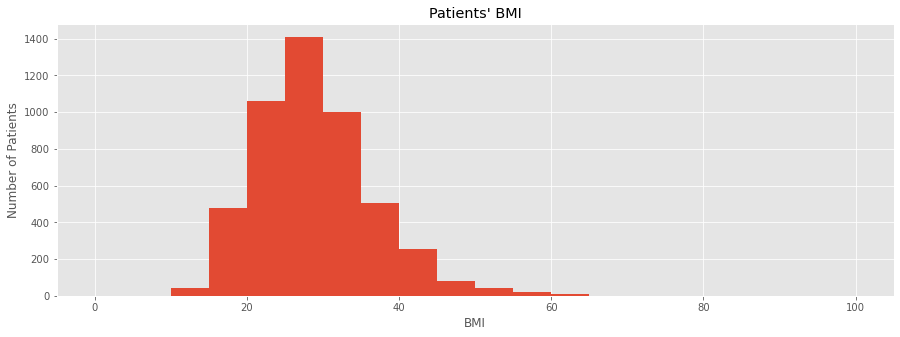

In [40]:
# now let's take a look at our nominal variables starting with BMI
plt.figure(figsize=(15,5))

bins = np.arange(0, df['bmi'].max()+5, 5)
plt.hist(data = df, x = 'bmi', bins = bins)

plt.title("Patients' BMI")
plt.xlabel('BMI')
plt.ylabel('Number of Patients');

#### What is the average Age?

C:\Users\ME\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


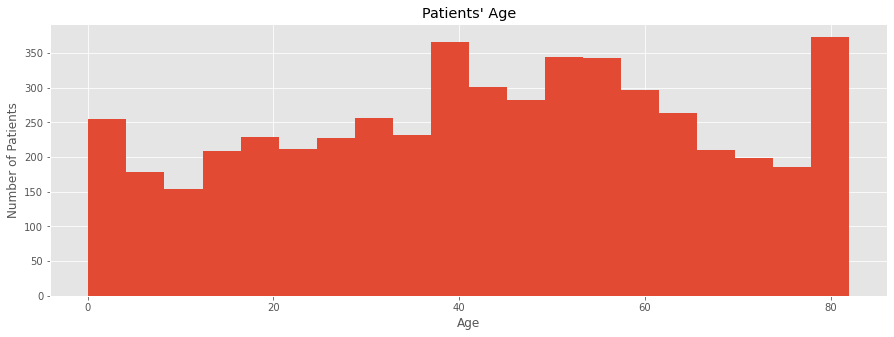

In [41]:
# and age
plt.figure(figsize=(15,5))

sb.distplot(df['age'], kde = False, hist_kws = {'alpha' : 1});

plt.title("Patients' Age")
plt.xlabel('Age')
plt.ylabel('Number of Patients');

#### What is the average Glucose Level?

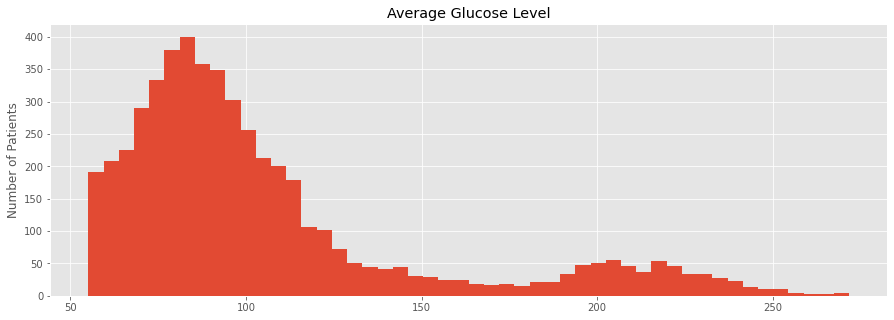

In [42]:
# finally, Average Glucose Level
plt.figure(figsize=(15,5))

sb.distplot(df['avg_glucose_level'], kde = False, hist_kws = {'alpha' : 1})

plt.title('Average Glucose Level')
plt.xlabel('')
plt.ylabel('Number of Patients');

#### we can see that BMI and Average Glucose Level are skewed to the right, while i age graph we see that most of our patients are between 40 and 80 years old.

In [43]:
# take a copy of our dataframe to prevent data loss
df2 = df.copy()

In [44]:
#correction of null values (unknown) in smoking_status column
df2.smoking_status.replace({'Unknown' : np.nan}, inplace = True)

#Test
df2.smoking_status.isnull().sum()

1544

In [45]:
# Correct data types
df2['id'] = df2.id.astype('object')
df2['age'] = df2['age'].astype('int')
df2[['gender', 'smoking_status']] = df2[['gender', 'smoking_status']].astype('category')
df2[['hypertension', 'heart_disease', 'stroke']] = df2[['hypertension', 'heart_disease', 'stroke']].astype('bool')

# Test
df2.dtypes

id                     object
gender               category
age                     int32
hypertension             bool
heart_disease            bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [46]:
# Drop rows with null values.
df2.drop(df2[df2['bmi'].isnull()].index, inplace = True)
df2.drop(df2[df2['smoking_status'].isnull()].index, inplace = True)

# Test
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [47]:
# adding 2 catigorical columns ['age_groups', 'weight_status] to facilitate visualization and analysi
df2['age_groups'] = pd.cut(df2.age, [0, 14, 24, 64, 100], labels = ['Children', 'Youth', 'Adults', 'Seniors'])
df2['weight_status'] = pd.cut(df2.bmi, [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels = ['Under Weight', 'Healthy', 'Over Weight', 'Obese', 'Severly Obese', 'Morbidly Obese'])

#Test
df2.sample(5)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,age_groups,weight_status
2219,37128,Male,34,False,False,134.61,23.4,never smoked,False,Adults,Healthy
3782,5006,Female,46,False,False,85.84,21.2,never smoked,False,Adults,Healthy
370,28286,Male,44,False,False,74.91,37.5,never smoked,False,Adults,Severly Obese
4457,50070,Female,62,True,False,261.67,43.0,formerly smoked,False,Adults,Morbidly Obese
658,21117,Female,36,False,False,77.12,28.4,never smoked,False,Adults,Over Weight


In [48]:
#drop duplicates
df2.drop_duplicates(inplace = True)

#testing
df2.duplicated().sum()

0

In [49]:
# Final touch 
df2 = df2[['id', 'gender', 'age', 'age_groups', 'bmi', 'weight_status', 'smoking_status', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke']]
df2.reset_index(drop = True, inplace = True)

# Test
df2.tail(3)

,id,gender,age,age_groups,bmi,weight_status,smoking_status,avg_glucose_level,hypertension,heart_disease,stroke
3422,44873,Female,81,Seniors,40.0,Morbidly Obese,never smoked,125.20,False,False,False
3423,19723,Female,35,Adults,30.6,Obese,never smoked,82.99,False,False,False
3424,37544,Male,51,Adults,25.6,Over Weight,formerly smoked,166.29,False,False,False


In [50]:
# Storing the final dataset
df2.to_csv('Final_Stroke.csv', index = False)

#### What age group are they on?

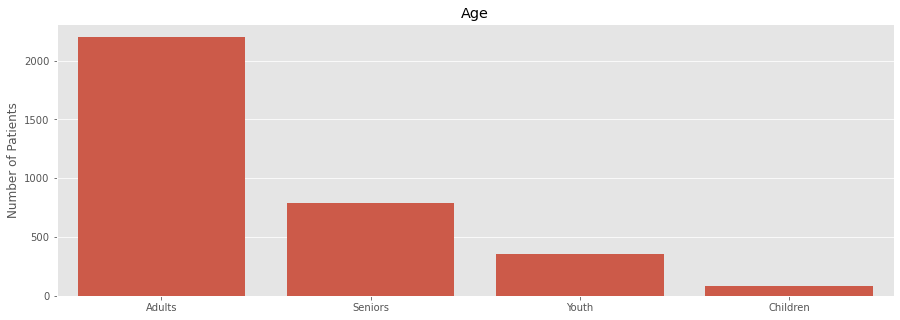

In [51]:
# now let's take a look at our age group column
plt.figure(figsize=(15,5))

Age_Order = df2['age_groups'].value_counts().index
sb.countplot(data = df2, x = 'age_groups', color = base_color, order = Age_Order)

plt.title('Age')
plt.xlabel('')
plt.ylabel('Number of Patients');

#### How fit are they?

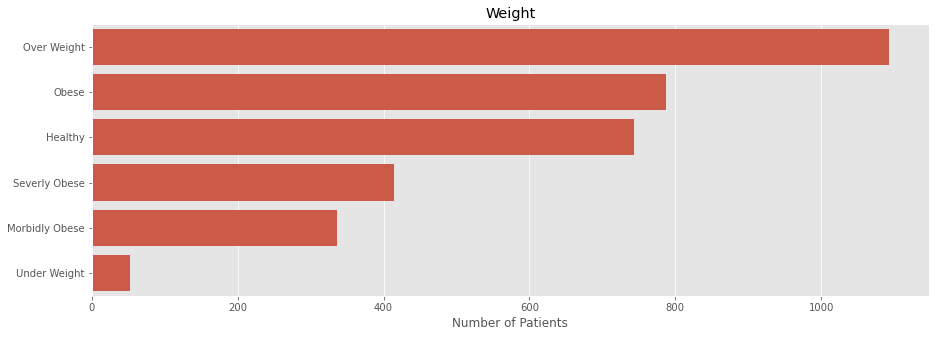

In [52]:
# and the weight status column
plt.figure(figsize=(15,5))

weight_Order = df2['weight_status'].value_counts().index
sb.countplot(data = df2, y = 'weight_status', color = base_color, order = weight_Order)

plt.title('Weight')
plt.xlabel('Number of Patients')
plt.ylabel('');

#### from here we can see that so many of them are adults and they're -sadly- over weighted.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there were some Quality Issues:
>    * wrong representing of null values in (smoking_status) column.
>    * erroneous data type of (id, gender, age, hypertension, heart_disease, smoking_status, stroke) columns.
>    * missing data in [bmi, smoking_status] columns.
>    * duplicated row.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned the dataset using pandas and numpy + I added 2 catigorical columns ['age_groups', 'weight_status] to facilitate visualization and analysis.

### now let's take adeeper look and see the relationship between them.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### is there a relationship between age and average glucose level?

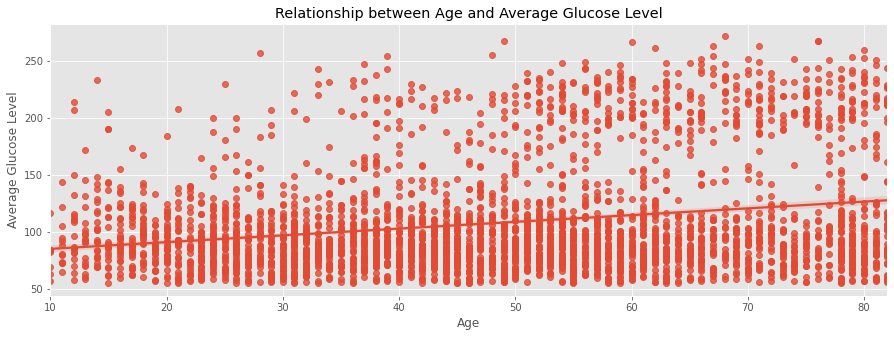

In [53]:
# Relationship between age and avg glucose level
plt.figure(figsize=(15,5))

sb.regplot(data = df2, x = 'age', y = 'avg_glucose_level')

plt.title('Relationship between Age and Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level');

#### a positive relationship appears between Age and Average Glucose Level.

#### Does Average Glucose level affect Stroke?

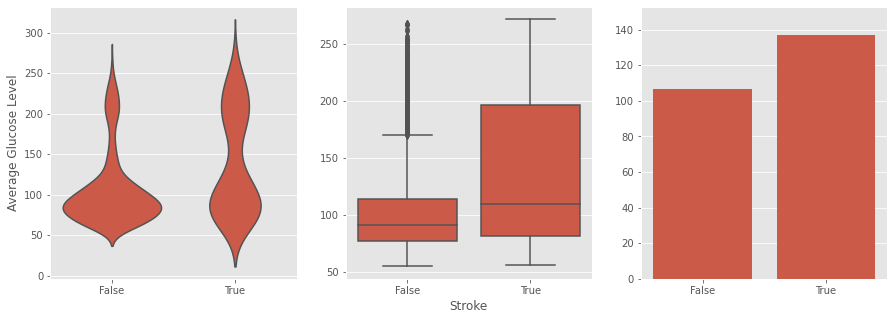

In [54]:
#let's start by the relationship between the Average Glocuse Level and stroke event
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df2, x='stroke', y='avg_glucose_level', inner = None, color = base_color)
plt.xlabel('')
plt.ylabel('Average Glucose Level')


# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df2, x='stroke', y='avg_glucose_level', color = base_color)
plt.xlabel('Stroke')
plt.ylabel('')

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df2, x='stroke', y='avg_glucose_level', color = base_color, errwidth = 0)
plt.xlabel('')
plt.ylabel('');

#### from the graph we can state that most of the patients who has experienced stroke event have high  glocuse level with average like 120-130 in their blood.

#### Does Ageing affect Stroke?

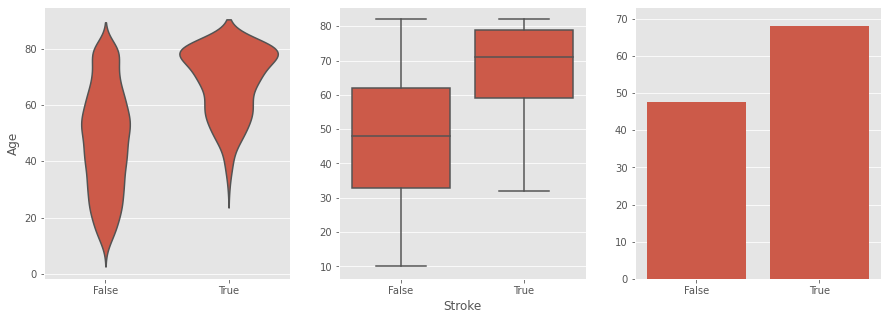

In [55]:
# now lets see the effect of age
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df2, x='stroke', y='age', inner = None, color = base_color)
plt.xlabel('')
plt.ylabel('Age')


# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df2, x='stroke', y='age', color = base_color)
plt.xlabel('Stroke')
plt.ylabel('')

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df2, x='stroke', y='age', color = base_color, errwidth = 0)
plt.xlabel('')
plt.ylabel('');

#### here we can see that patients who has experienced  stroke were between 60-80 years old

#### Does BMI affect Stroke?

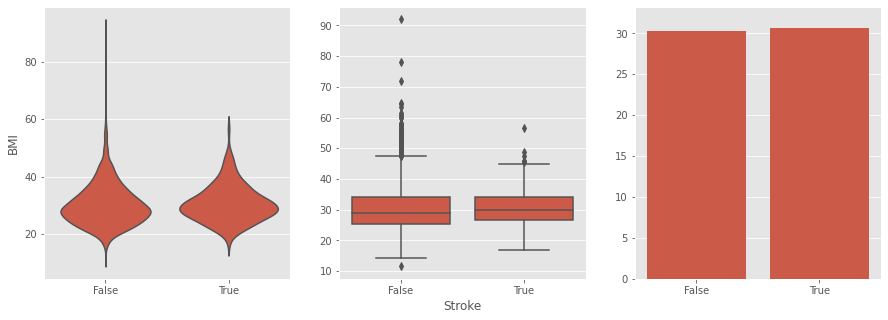

In [56]:
# now see what BMI has to show us
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df2, x='stroke', y='bmi', inner = None, color = base_color)
plt.xlabel('')
plt.ylabel('BMI')


# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df2, x='stroke', y='bmi', color = base_color)
plt.xlabel('Stroke')
plt.ylabel('')

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df2, x='stroke', y='bmi', color = base_color, errwidth = 0)
plt.xlabel('')
plt.ylabel('');

#### I don't see a huge effect of BMI on the Storke event but let's take a deeper look on the weight status maybe.

#### How does age goups, gender and weight status affect Stroke?

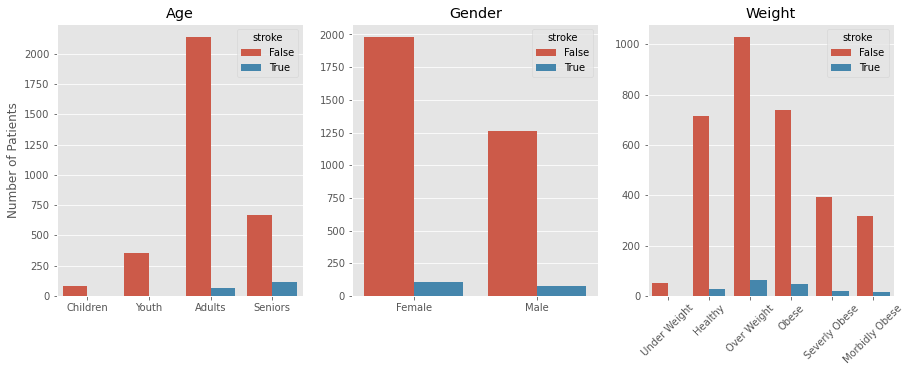

In [57]:
#now the categorical turn
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]

# left plot: age groups
plt.subplot(1, 3, 1)
sb.countplot(data = df2, x = 'age_groups', hue = 'stroke')
plt.title('Age')
plt.xlabel('')
plt.ylabel('Number of Patients')


# center plot: gender
plt.subplot(1, 3, 2)
sb.countplot(data = df2, x = 'gender', hue = 'stroke')
plt.title('Gender')
plt.xlabel('')
plt.ylabel('')

# right plot: weight status
plt.subplot(1, 3, 3)
sb.countplot(data = df2, x = 'weight_status', hue = 'stroke')
plt.title('Weight')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45);

#### from here we can see better that most females patients who has had a stroke were over weight and obese..
#### senior, as we stated before and adult in the second place ..

#### How other diseases history can affect Stroke?

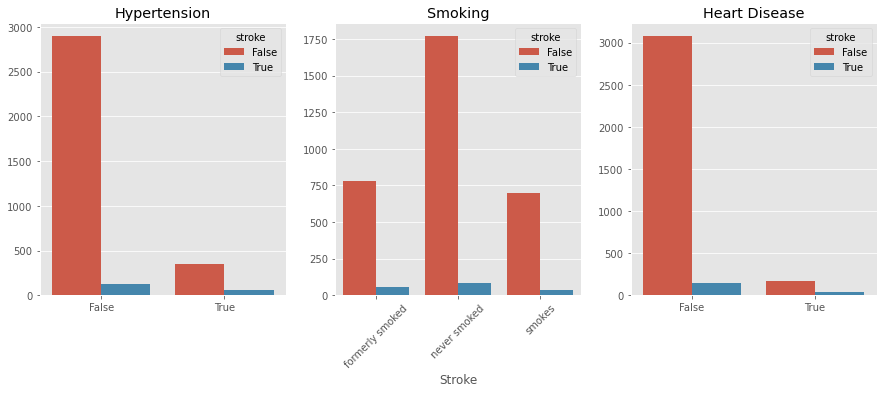

In [58]:
# the relationship between other diseases and stroke event
plt.figure(figsize=(15,5))
base_color = sb.color_palette()[0]

# left plot: hypertension
plt.subplot(1, 3, 1)
sb.countplot(data = df2, x = 'hypertension', hue = 'stroke')
plt.title("Hypertension")
plt.xlabel('')
plt.ylabel('')

# center plot: smoking_status
plt.subplot(1, 3, 2)
sb.countplot(data = df2, x = 'smoking_status', hue = 'stroke')
plt.title("Smoking")
plt.xlabel('Stroke')
plt.ylabel('')
plt.xticks(rotation = 45)

# center plot: heart_disease
plt.subplot(1, 3, 3)
sb.countplot(data = df2, x = 'heart_disease', hue = 'stroke')
plt.title("Heart Disease")
plt.xlabel('')
plt.ylabel('');

#### This figuer shows a strange relation where those who never smoked, nor have either of hypertension or heart disease, more likely to have had a stroke before!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Ii seems like avg glucose level effect having a stroke more than smoking, hypertension or even heart diseases
>
> also the BMI might look like it dosen't have a great effect on stroke but in deeper investigation we see that over weighted and obese peaple are more likely to have a stroke than others.
>
> some other factors like gender don't seem to have a great effect too.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> a positive relationship appears between Age and Average Glucose Level
>
> I'm going to investigate more nt this in the Multivariate Exploration.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### how weight and age together effect the stroke?

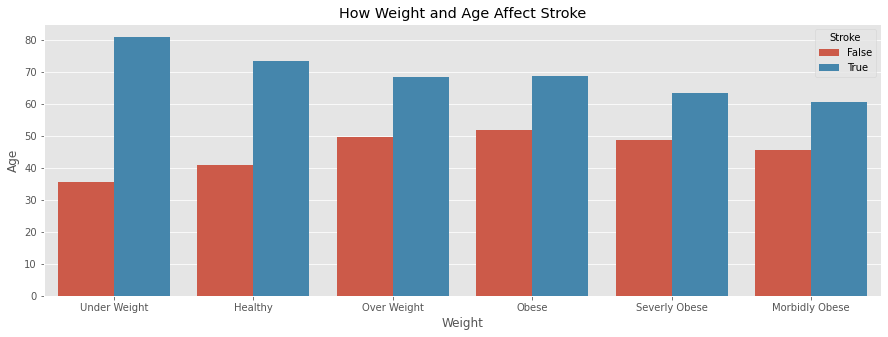

In [59]:
# how weight and age together effect the stroke
plt.figure(figsize=(15,5))

sb.barplot(data = df2, x = 'weight_status', y = 'age', hue = 'stroke', errwidth = 0)

plt.title("How Weight and Age Affect Stroke")
plt.xlabel('Weight')
plt.ylabel('Age')
plt.legend(title = 'Stroke');

#### Do Gender-Age relationship affect stroke?

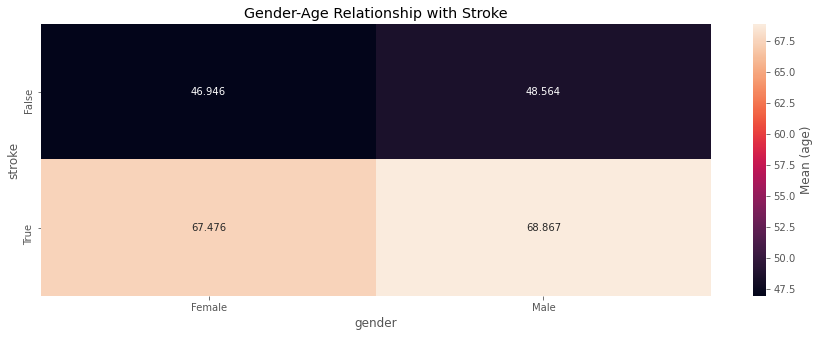

In [60]:
# Gender-Age relationship with stroke
plt.figure(figsize=(15,5))

cat_means = df2.groupby(['gender', 'stroke']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'stroke', columns = 'gender', values = 'age_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Mean (age)'})

plt.title('Gender-Age Relationship with Stroke');

#### as we said before and is showen in the figure above seniors are more likely to have a stroke.
#### and from this heat map we can see that those who are more likely to have a stroke are people  in their late 60s (males and females)

#### # how average glucose level and smoking effect the sroke?

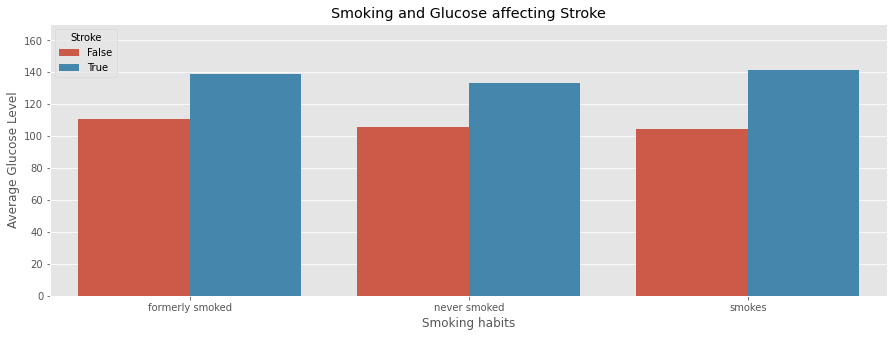

In [61]:
# how average glucose level and smoking effect the sroke
plt.figure(figsize=(15,5))

sb.barplot(data = df2, x = 'smoking_status', y = 'avg_glucose_level', hue = 'stroke', errwidth = 0)

plt.title('Smoking and Glucose affecting Stroke')
plt.xlabel("Smoking habits")
plt.ylabel("Average Glucose Level")
plt.legend(title = 'Stroke');

#### How other diseases can effect stroke?

C:\Users\ME\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


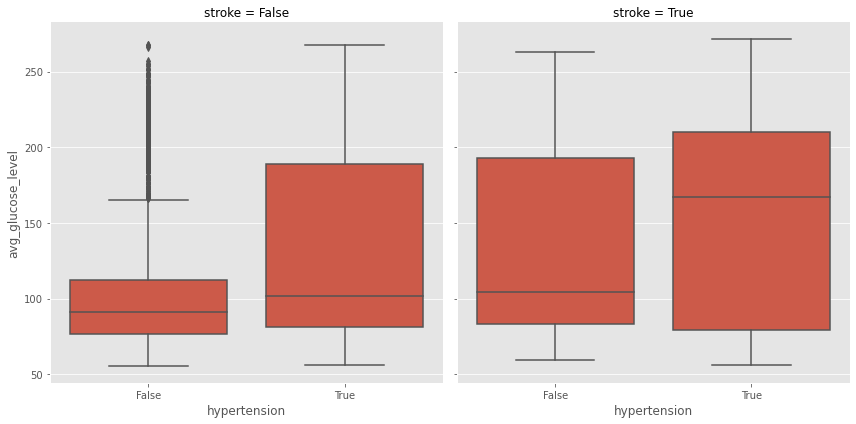

In [62]:
# Hypertension and Glucose affecting Stroke
g = sb.FacetGrid(data = df2, col = 'stroke', height = 6)
g.map(sb.boxplot, 'hypertension', 'avg_glucose_level')

plt.xlabel('hypertension');

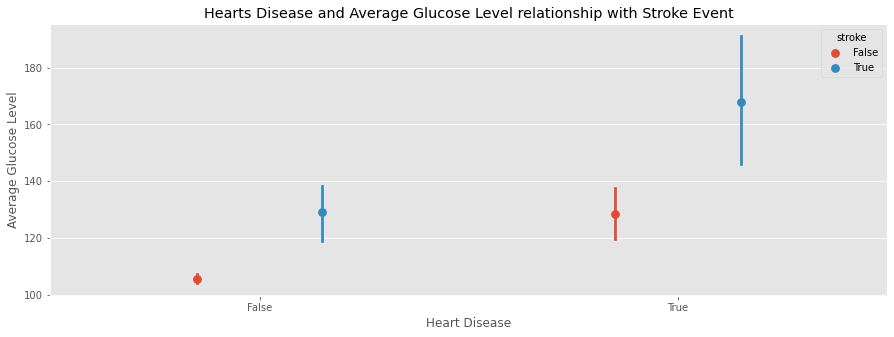

In [63]:
# Suger and heart disease effects on stroke
plt.figure(figsize=(15,5))

sb.pointplot(data = df2, x = 'heart_disease', y = 'avg_glucose_level', hue = 'stroke', dodge = 0.3, linestyles = "")

plt.title('Hearts Disease and Average Glucose Level relationship with Stroke Event')
plt.xlabel('Heart Disease')
plt.ylabel('Average Glucose Level');

#### from here we can confirm that smokers  with high blood suger in addition to hypertension and heart disease history are more likely to have a stroke.

#### Do BMI-Gender affecting stroke?

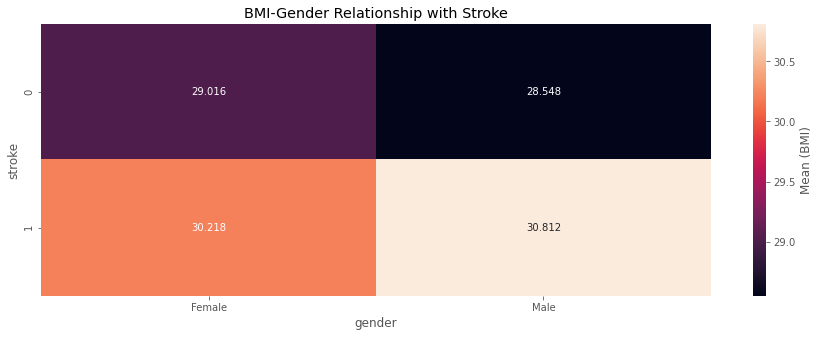

In [64]:
# BMI-Gender affecting stroke
plt.figure(figsize=(15,5))

cat_means = df.groupby(['gender', 'stroke']).mean()['bmi']
cat_means = cat_means.reset_index(name = 'bmi_avg')
cat_means = cat_means.pivot(index = 'stroke', columns = 'gender', values = 'bmi_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Mean (BMI)'})

plt.title('BMI-Gender Relationship with Stroke');

#### Obese patients are more likely to have a stroke than others.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As a final conclusion we can state that several variables are affecting have a stroke like diseases history (Suger, Heart Diseases or hypertension) in addition to bad habits like smoking or unhealthy food ..  and the natural effect of aging.

### Were there any interesting or surprising interactions between features?

> yes, some variables didn't show a huge differnce at first but after further investigation it appears that they actually affect Stroke like when we took a look at BMI at first it seemed like it doesn't have a strong effect on Strok but the effect appears in weight status that over weighted and obese peaple are more likely to have a stroke than others.
>
> another thing when we looked at smoking status it showed us that none smokers are more likely to have a stroke which was so strange but after a deeper look we saw that no actually smoking DOES affect the stroke.
>
> and some other attributes were so obvious from the start like high average glucose level and ageing..